### 1.文件预处理

In [1]:
import matplotlib.pyplot as plt
from align_image_code import align_images
import cv2
import math
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import skimage.transform as sktr
import skimage.color as color
import skimage.io as skio
import scipy.misc
from scipy import signal
import scipy
plt.rcParams['image.cmap'] = 'gray'
%pylab inline

# First load images
# high sf
imhigh = plt.imread('./DerekPicture.jpg')/255.
# low sf
imlow = plt.imread('./nutmeg.jpg')/255

img1 = plt.imread('./DerekPicture.jpg')
img2 = plt.imread('./nutmeg.jpg')

Populating the interactive namespace from numpy and matplotlib


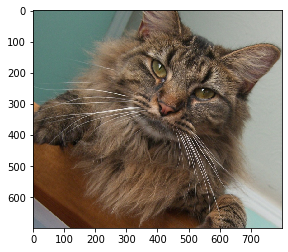

In [15]:
imlow = plt.imread('./nutmeg.jpg')/255
imlow = imlow[100:800,200:1000]
plt.imshow(imlow)

### 2.图像校准


In [23]:
def transferimage2(img1_color,img2_color): # 构造仿射变换矩阵
    # Image to be aligned.  img1_color = cv2.imread("align.jpg")  
    # Reference image.  img2_color = cv2.imread("ref.jpg")    
    # Convert to grayscale. 
    img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
    img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
    height, width = img2.shape
#     # Convert to sss
#     img1 = img1[200:820,500:1100]
#     img2 = img2[200:820,500:1100]
#     imggg = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
#     height, width = imggg.shape 
    # Create ORB detector with 5000 features. 
    orb_detector = cv2.ORB_create(5000) 
    # Find keypoints and descriptors. 
    # The first arg is the image, second arg is the mask 
    #  (which is not reqiured in this case). 
    kp1, d1 = orb_detector.detectAndCompute(img1, None) 
    kp2, d2 = orb_detector.detectAndCompute(img2, None) 
    # Match features between the two images. 
    # We create a Brute Force matcher with  
    # Hamming distance as measurement mode. 
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
    # Match the two sets of descriptors. 
    matches = matcher.match(d1, d2) 
    # Sort matches on the basis of their Hamming distance. 
    matches.sort(key = lambda x: x.distance) 
    # Take the top 90 % matches forward. 
    matches = matches[:int(len(matches)*90)] 
    no_of_matches = len(matches) 
    # Define empty matrices of shape no_of_matches * 2. 
    p1 = np.zeros((no_of_matches, 2)) 
    p2 = np.zeros((no_of_matches, 2)) 
    for i in range(len(matches)): 
      p1[i, :] = kp1[matches[i].queryIdx].pt 
      p2[i, :] = kp2[matches[i].trainIdx].pt 
    # Find the homography matrix. 
    homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
    # Use this matrix to transform the 
    # colored image wrt the reference image. 
    transformed_img = cv2.warpPerspective(img1_color, 
                        homography, (width, height)) 
    return transformed_img

In [24]:
im2_aligned = transferimage(img2,img1)

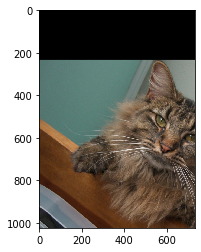

In [25]:
plt.imshow(im2_aligned)

Please select 2 points in each image for alignment.


ValueError: not enough values to unpack (expected 2, got 0)

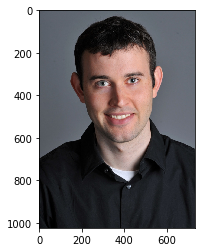

In [19]:
# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(imhigh, imlow)

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies
sigma1 = arbitrary_value_1
sigma2 = arbitrary_value_2

### 3.图像融合

In [ ]:
def hybrid_image(imhigh, imlow, sigma1, sigma2):
    

Please select 2 points in each image for alignment.


ValueError: not enough values to unpack (expected 2, got 0)

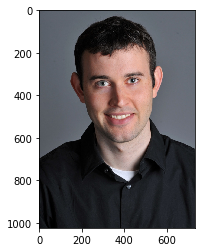

In [9]:
hybrid = hybrid_image(imhigh, imlow, sigma1, sigma2)

## Compute and display Gaussian and Laplacian Pyramids
## You also need to supply this function
N = 5 # suggested number of pyramid levels (your choice)
pyramids(hybrid, N)

In [7]:
plt.imshow(hybrid)

NameError: name 'hybrid' is not defined